In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
winners_list = pd.read_csv('./winners_list.csv')
results = pd.read_csv('./results.csv')

In [4]:
winners_list.head(121)

,StateName,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party name
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands(1),BISHNU PADA RAY,102436,24396,Bharatiya Janata Party - BJP
1,Andhra Pradesh,Srikakulam(2),KINJARAPU RAMMOHAN NAIDU,754328,327901,Telugu Desam - TDP
2,Andhra Pradesh,Vizianagaram(3),APPALANAIDU KALISETTI,743113,249351,Telugu Desam - TDP
3,Andhra Pradesh,Visakhapatnam(4),SRIBHARAT MATHUKUMILI,907467,504247,Telugu Desam - TDP
4,Andhra Pradesh,Amalapuram (SC)(7),G M HARISH (BALAYOGI),796981,342196,Telugu Desam - TDP
...,...,...,...,...,...,...
116,Gujarat,Vadodara(20),DR. HEMANG JOSHI,873189,582126,Bharatiya Janata Party - BJP
117,Gujarat,Chhota Udaipur(21),JASHUBHAI BHILUBHAI RATHVA,796589,398777,Bharatiya Janata Party - BJP
118,Gujarat,Bharuch(22),MANSUKHBHAI DHANJIBHAI VASAVA,608157,85696,Bharatiya Janata Party - BJP
119,Gujarat,Bardoli(23),PARBHUBHAI NAGARBHAI VASAVA,763950,230253,Bharatiya Janata Party - BJP


In [5]:
winners_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StateName                543 non-null    object
 1   Parliament Constituency  543 non-null    object
 2   Winning Candidate        543 non-null    object
 3   Total Votes              543 non-null    object
 4   Margin                   543 non-null    object
 5   Party name               543 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Party    42 non-null     object 
 1   Won      42 non-null     float64
 2   Leading  42 non-null     float64
 3   Total    42 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.5+ KB


In [7]:
winners_list['Total Votes'] = pd.to_numeric(winners_list['Total Votes'],errors='coerce')

In [8]:
winners_list['Margin'] = pd.to_numeric(winners_list['Margin'],errors='coerce')

# Insights from the Scraped Data

### 1. Party-wise Seats Won

This showcases the seats won by each party throught India for forming power at the central level

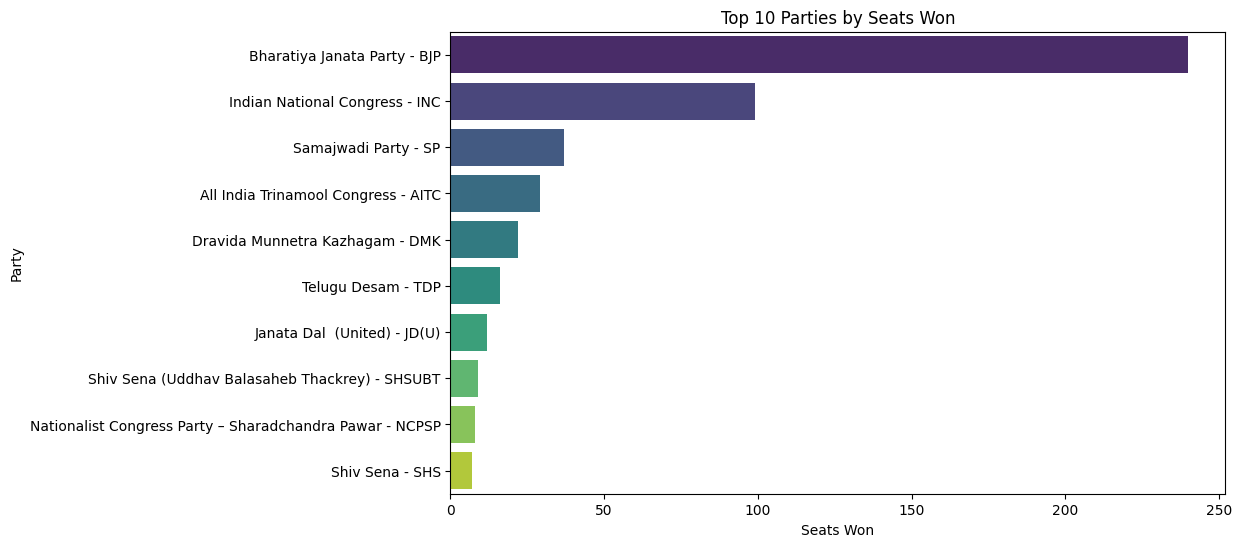

In [9]:
seats_won = results.groupby('Party')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=seats_won.values,y=seats_won.index,hue=seats_won.index,palette='viridis')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Top 10 Parties by Seats Won')
plt.show()

### 2. Party-wise Performance - Total Votes

This plot shows the total number of votes each party have won

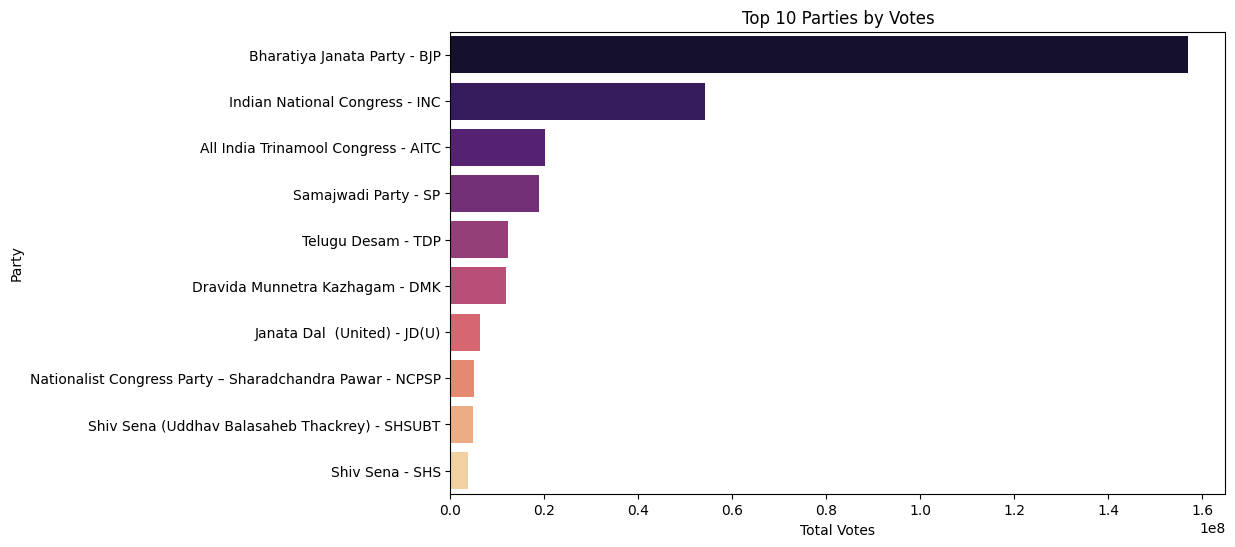

In [10]:
top_parties_by_votes = winners_list.groupby('Party name')['Total Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_parties_by_votes.values, y=top_parties_by_votes.index,hue=top_parties_by_votes.index, palette='magma')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.title('Top 10 Parties by Votes')
plt.show()

### 3. Constituency-wise Voting Margin

This plot showcases the highest margins of all constituencies

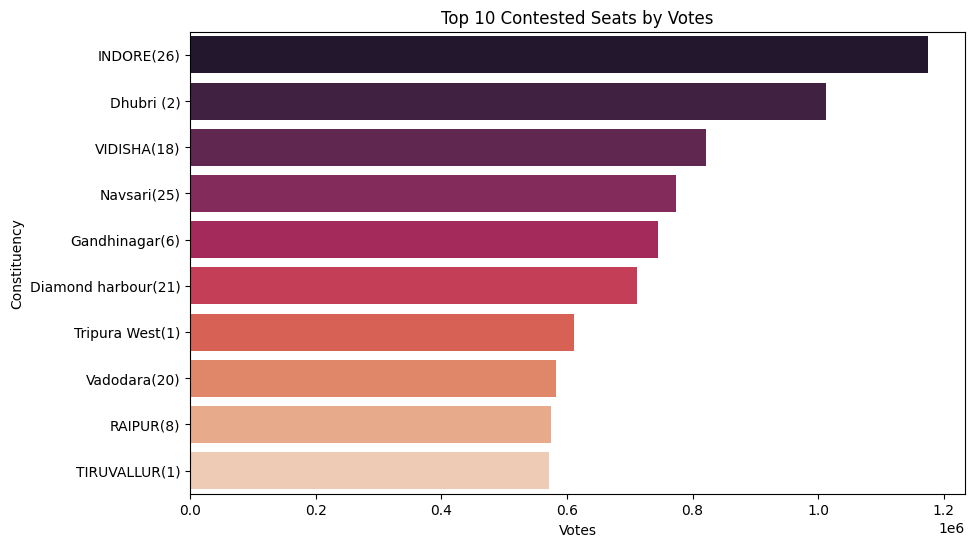

In [11]:
top_contested_seats = winners_list.sort_values(by='Margin', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Parliament Constituency',hue='Parliament Constituency',data=top_contested_seats, palette='rocket')
plt.xlabel('Votes')
plt.ylabel('Constituency')
plt.title('Top 10 Contested Seats by Votes')
plt.show()


### 4. State-wise Total Votes

This plot shows the state wise total votes 

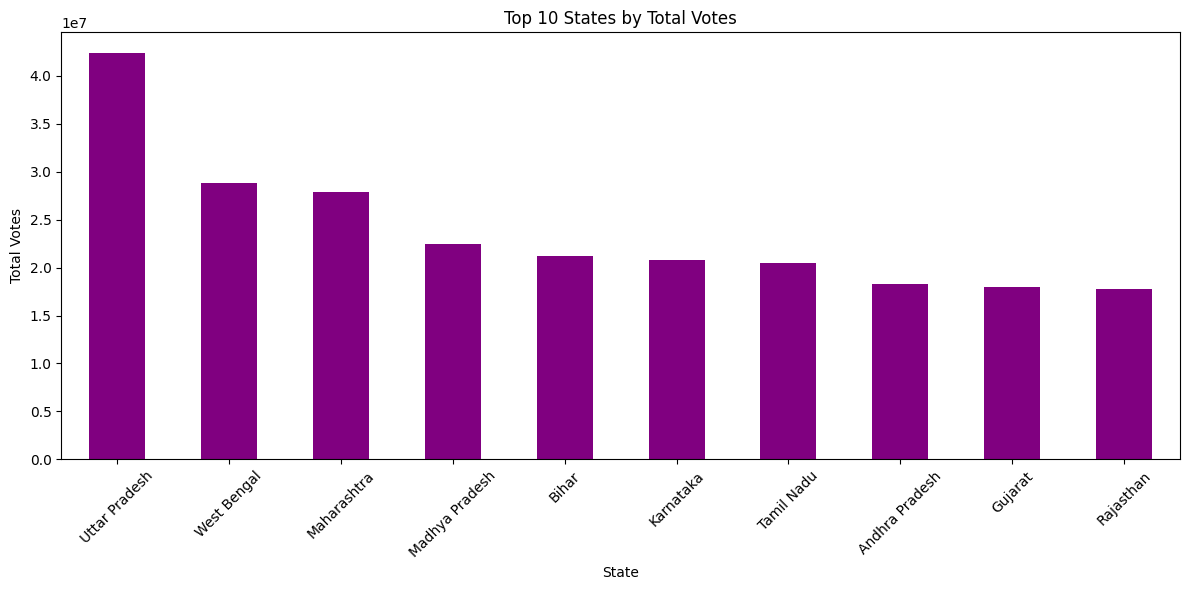

In [12]:
state_total_votes = winners_list.groupby('StateName')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_total_votes.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 States by Total Votes')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Distribution of Margin of Victory

This plot describes the margin for victory

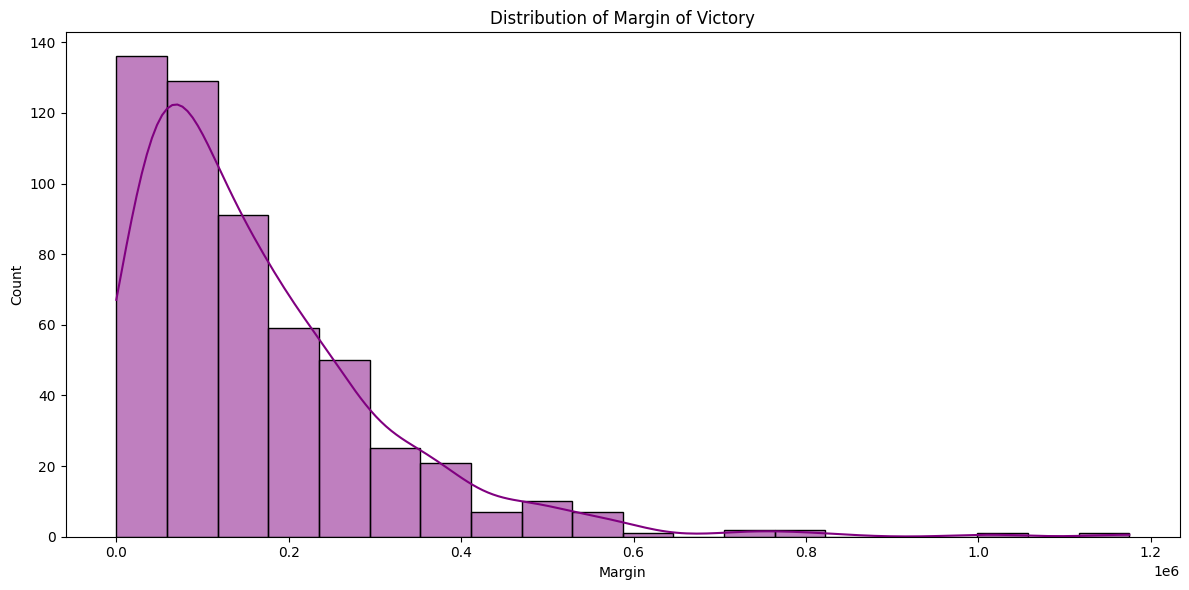

In [13]:
# Distribution of Margin of Victory
plt.figure(figsize=(12, 6))
sns.histplot(winners_list['Margin'], bins=20, kde=True, color='purple')
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 6.  Voter Turnout by State

This plot shows the number of people has voted by state

C:\Users\Test\AppData\Local\Temp\ipykernel_17172\1567643190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StateName', y='Total Votes', data=winners_list, palette='rainbow')


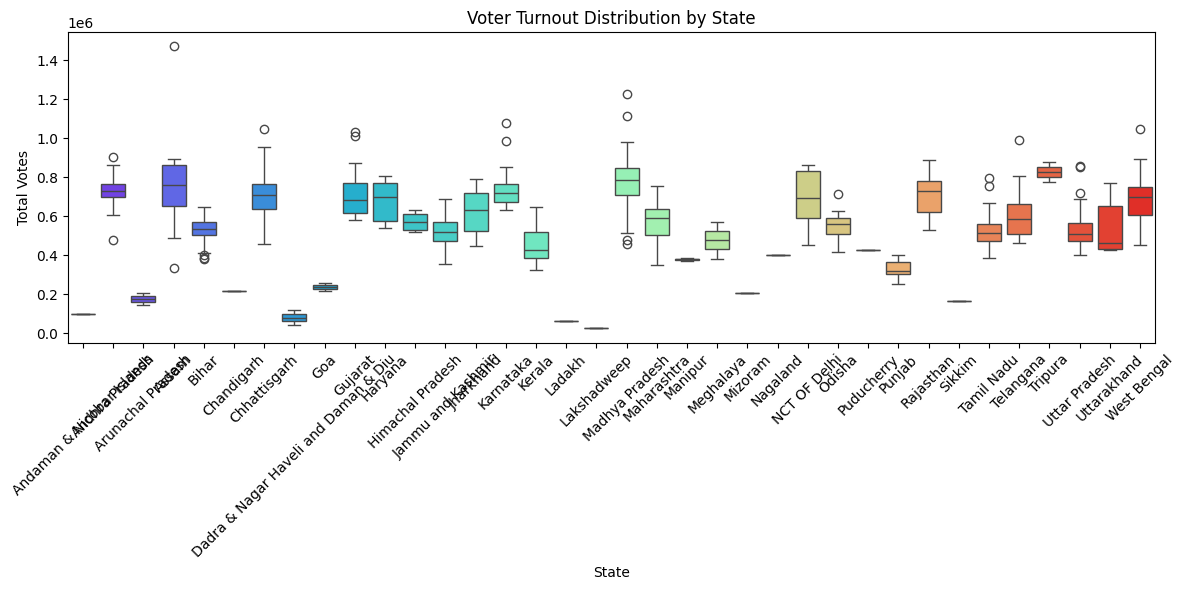

In [14]:
# Voter Turnout Distribution by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='StateName', y='Total Votes', data=winners_list, palette='rainbow')
plt.title('Voter Turnout Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 7. Margin vs. Total Votes Scatter Plot

This showcases the difference between margin and the total votes 

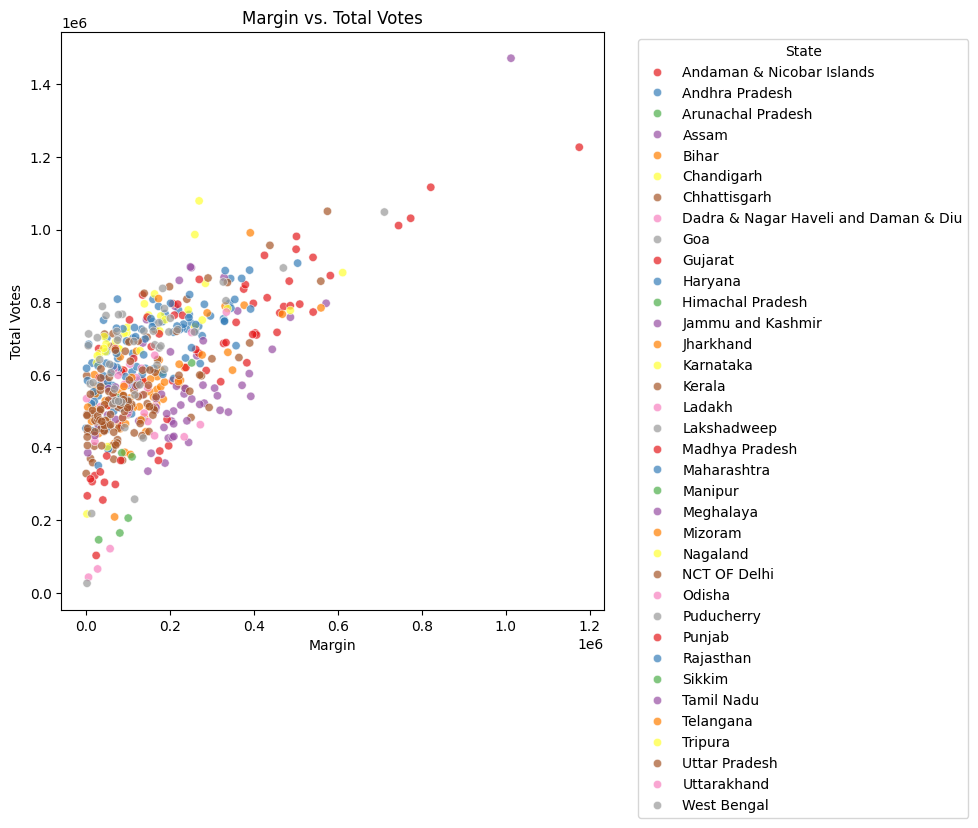

In [15]:
# Margin vs. Total Votes Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Margin', y='Total Votes', data=winners_list, hue='StateName', palette='Set1', alpha=0.7)
plt.title('Margin vs. Total Votes')
plt.xlabel('Margin')
plt.ylabel('Total Votes')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 8. Candidate wise voting margin

This showcases the candidate wise voting margin

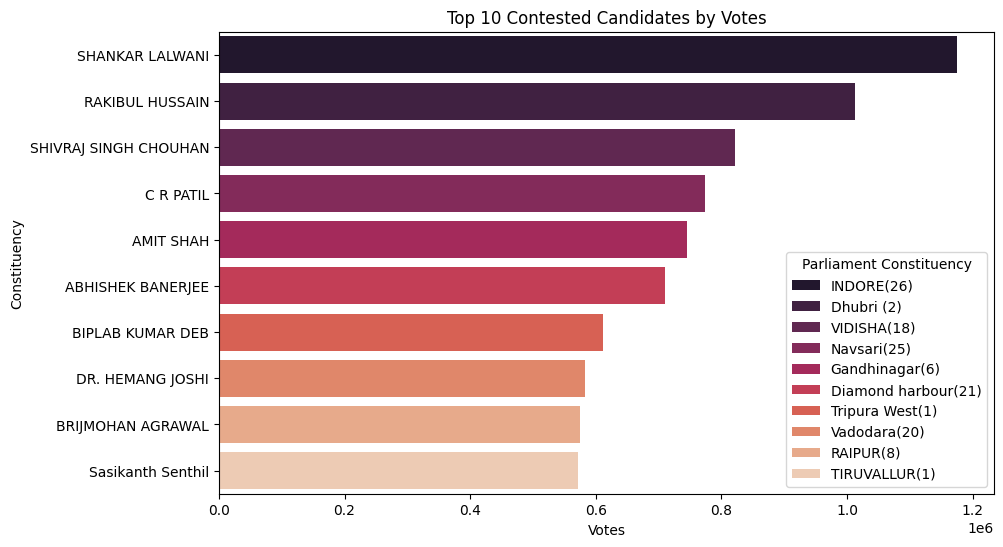

In [17]:
top_contested_seats = winners_list.sort_values(by='Margin', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Winning Candidate',hue='Parliament Constituency',data=top_contested_seats, palette='rocket')
plt.xlabel('Votes')
plt.ylabel('Constituency')
plt.title('Top 10 Contested Candidates by Votes')
plt.show()


### 9. State wise Party Performance

This plot explains about each party performance at each state

In [31]:
state_wise_party = winners_list.groupby(['StateName','Party name'])['Total Votes'].sum().reset_index()
state_wise_party

,StateName,Party name,Total Votes
0,Andaman & Nicobar Islands,Bharatiya Janata Party - BJP,102436.0
1,Andhra Pradesh,Bharatiya Janata Party - BJP,2195927.0
2,Andhra Pradesh,Janasena Party - JnP,1454138.0
3,Andhra Pradesh,Telugu Desam - TDP,12232822.0
4,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party - YSRCP,2359220.0
...,...,...,...
91,Uttar Pradesh,Samajwadi Party - SP,18826855.0
92,Uttarakhand,Bharatiya Janata Party - BJP,2750408.0
93,West Bengal,All India Trinamool Congress - AITC,20185370.0
94,West Bengal,Bharatiya Janata Party - BJP,8093428.0


In [32]:
states = state_wise_party['StateName'].unique()

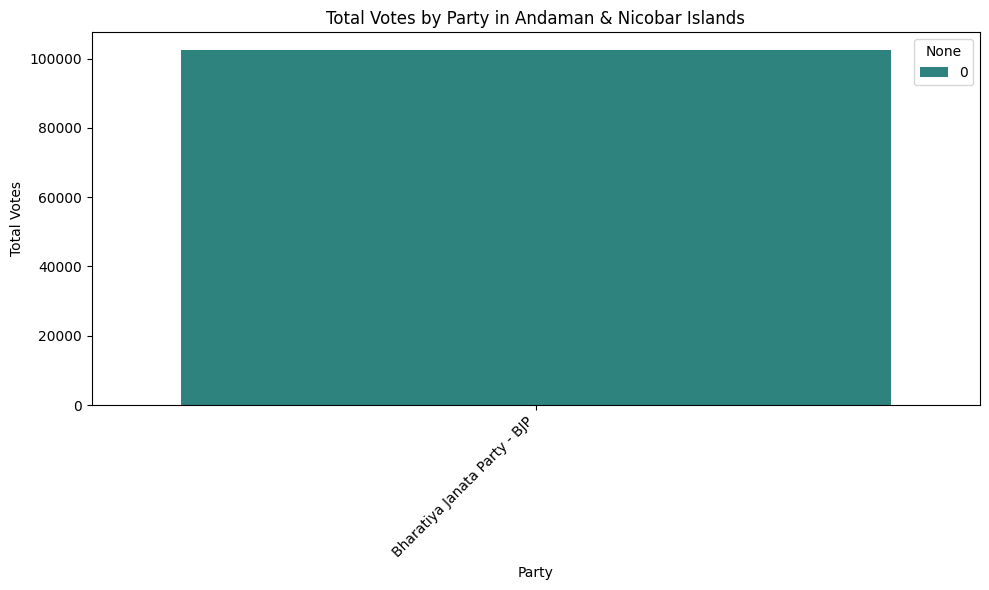

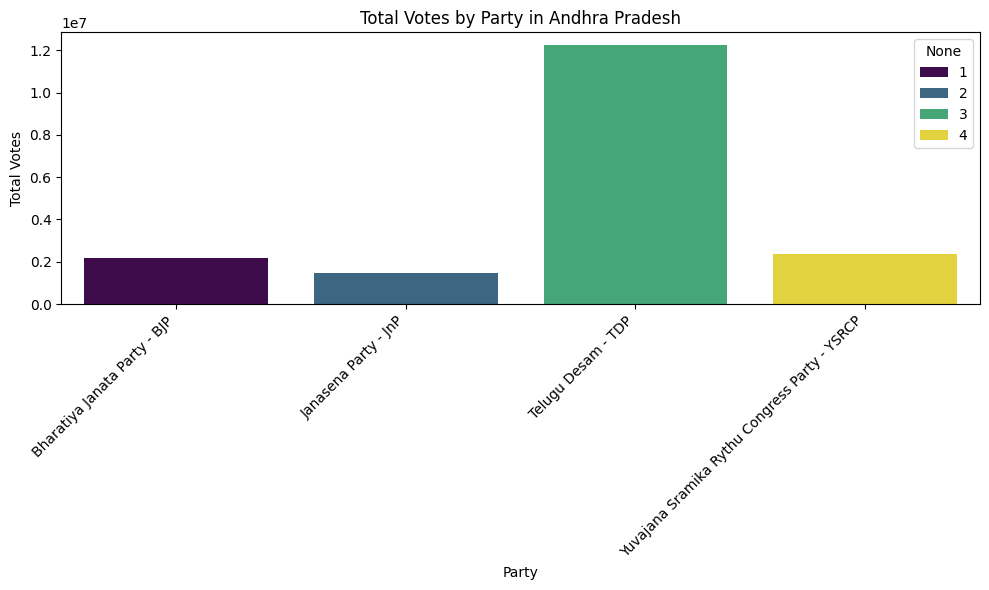

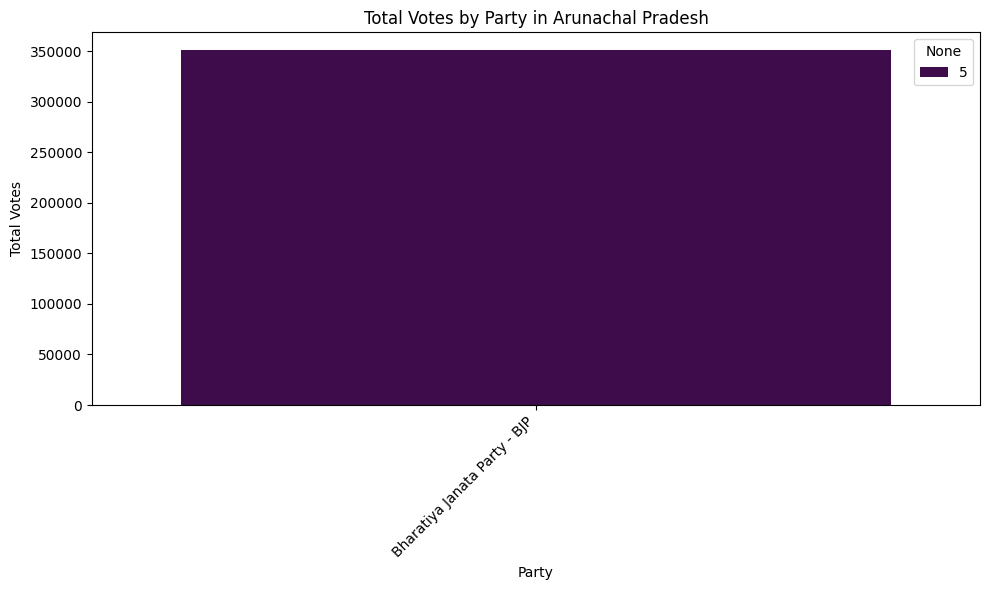

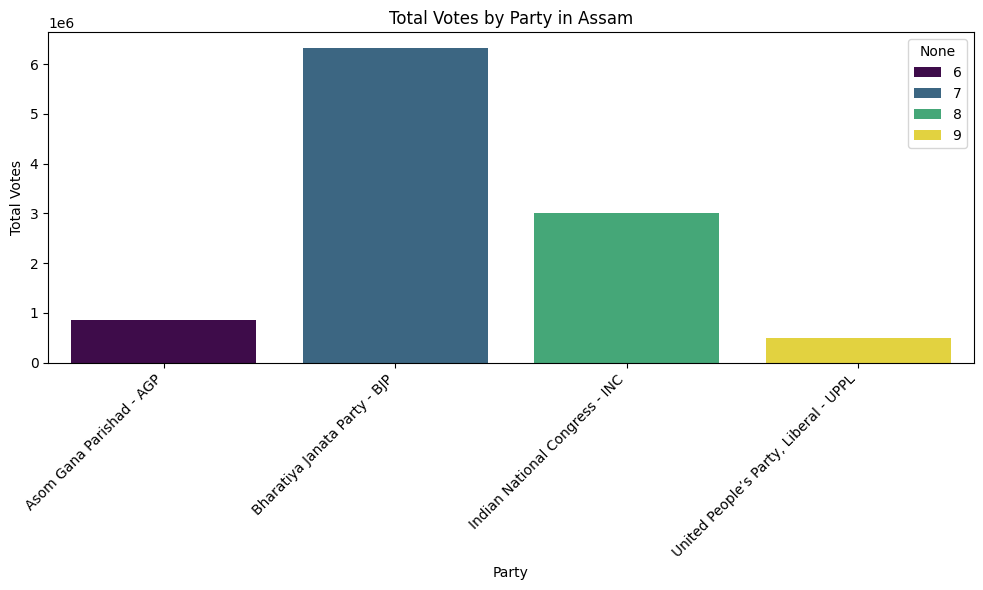

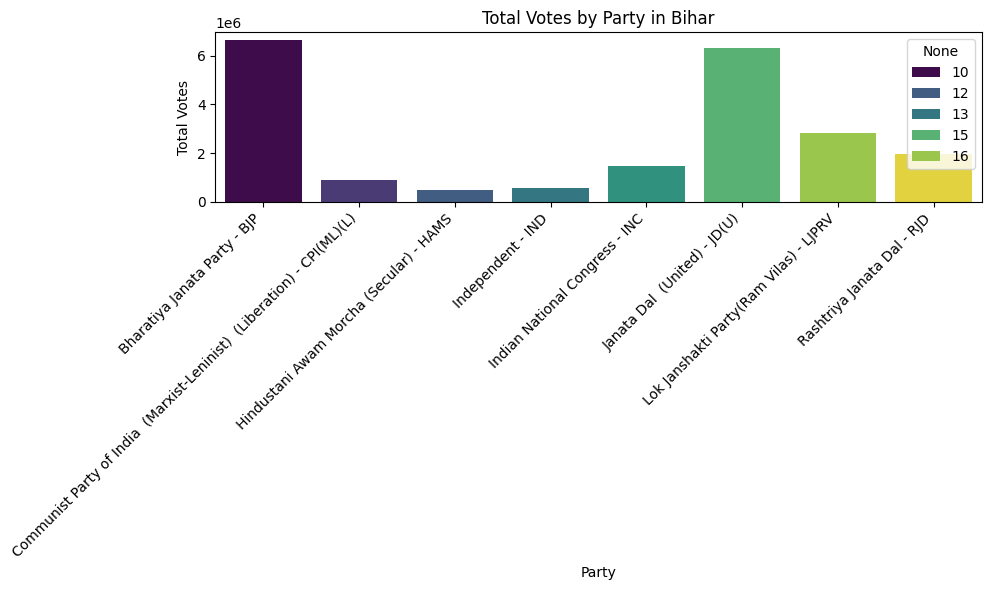

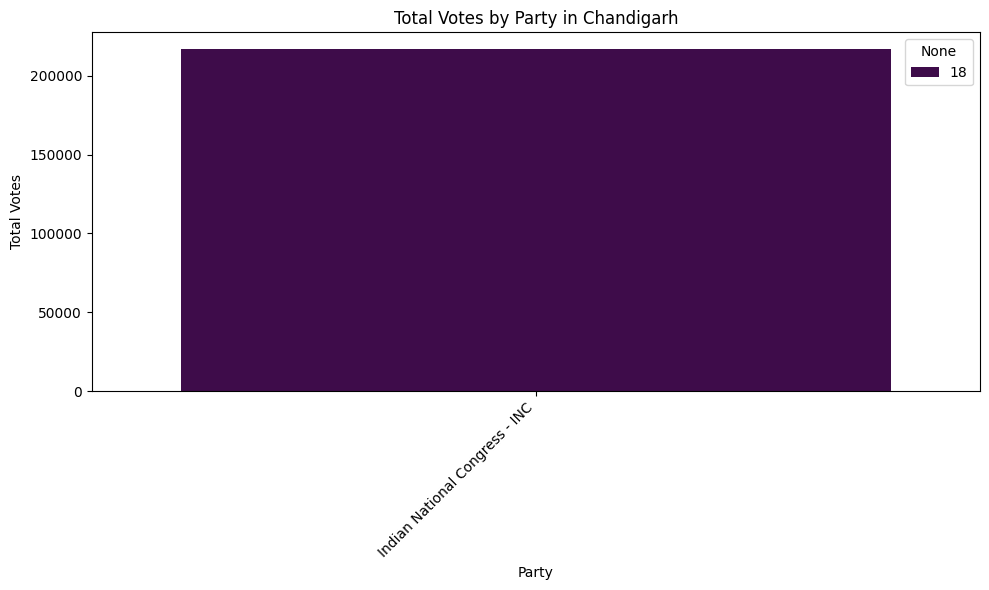

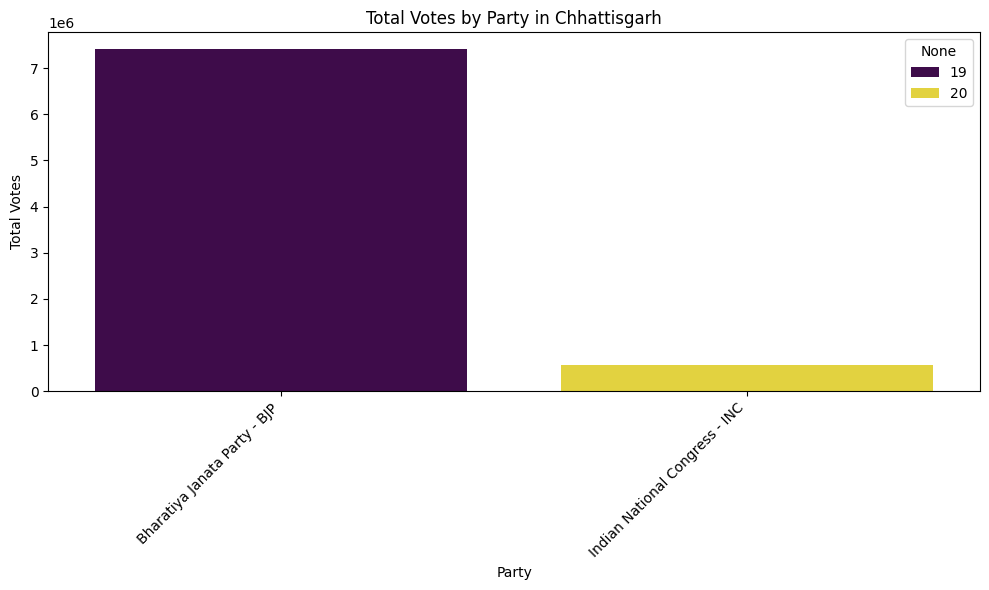

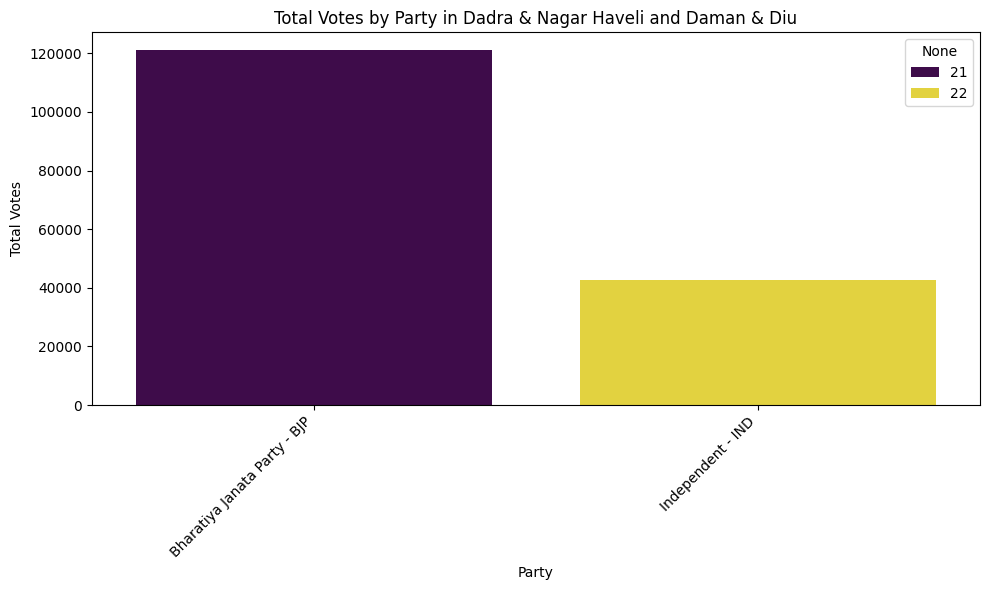

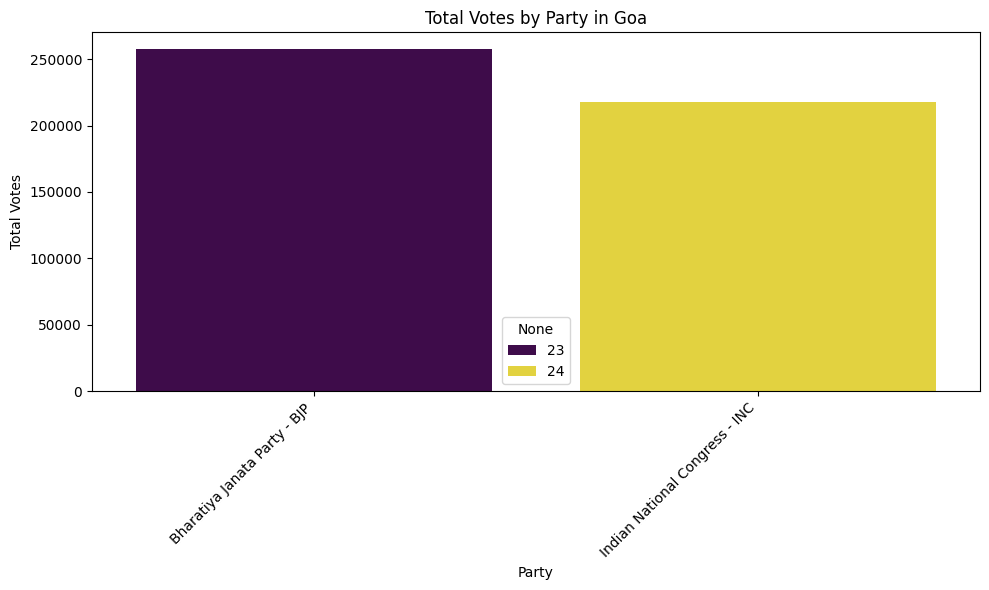

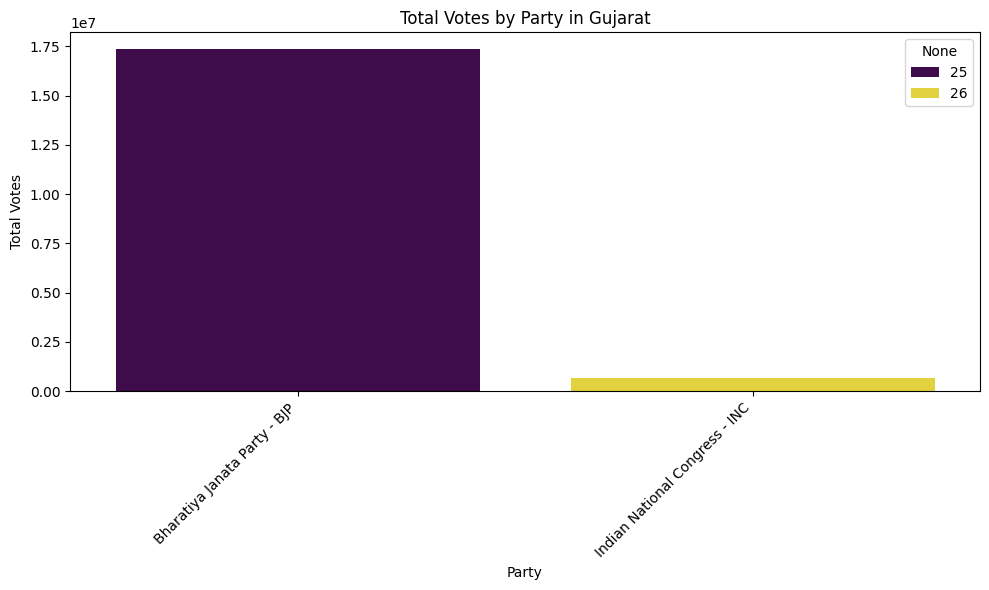

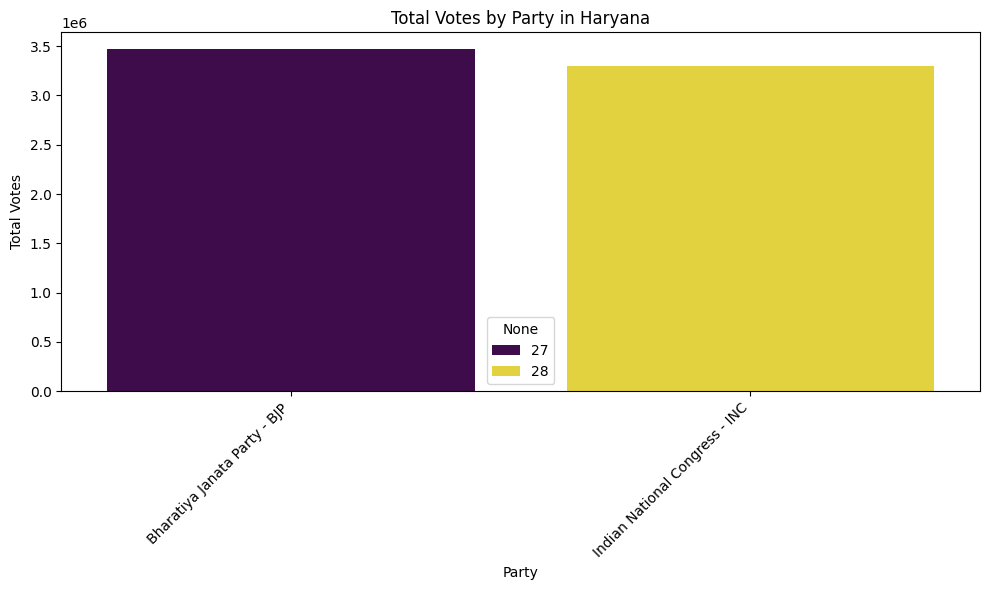

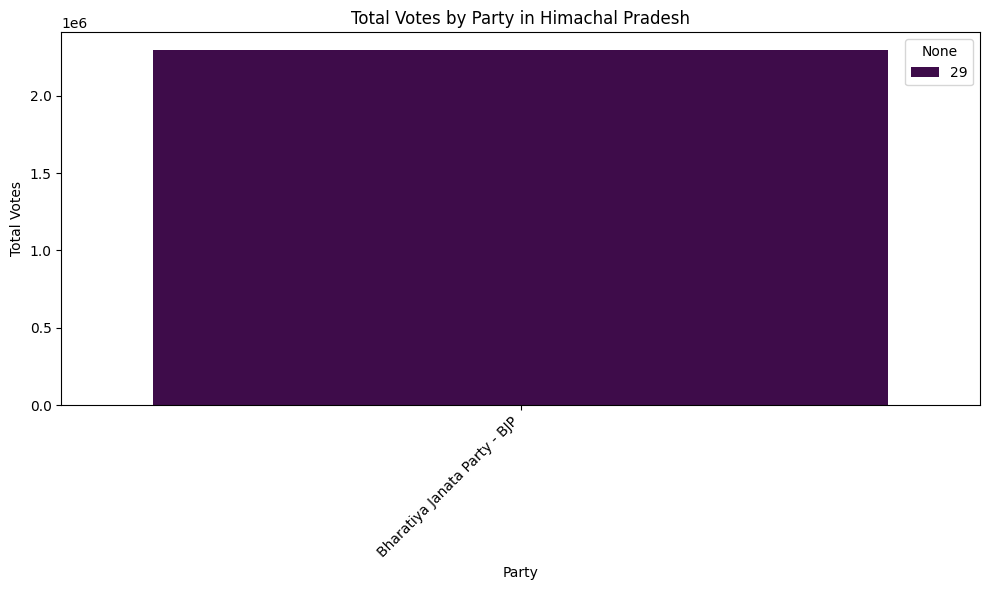

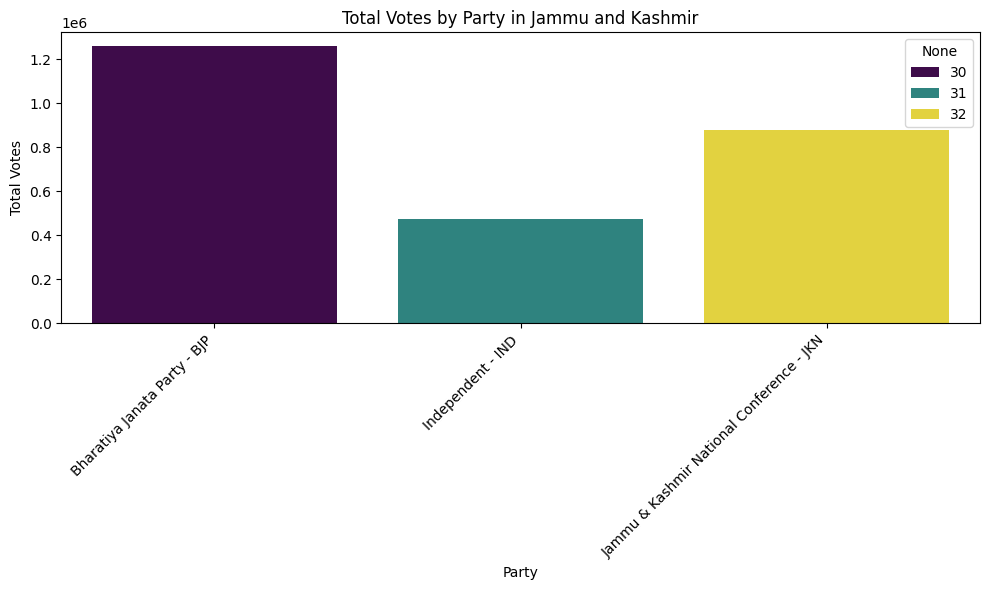

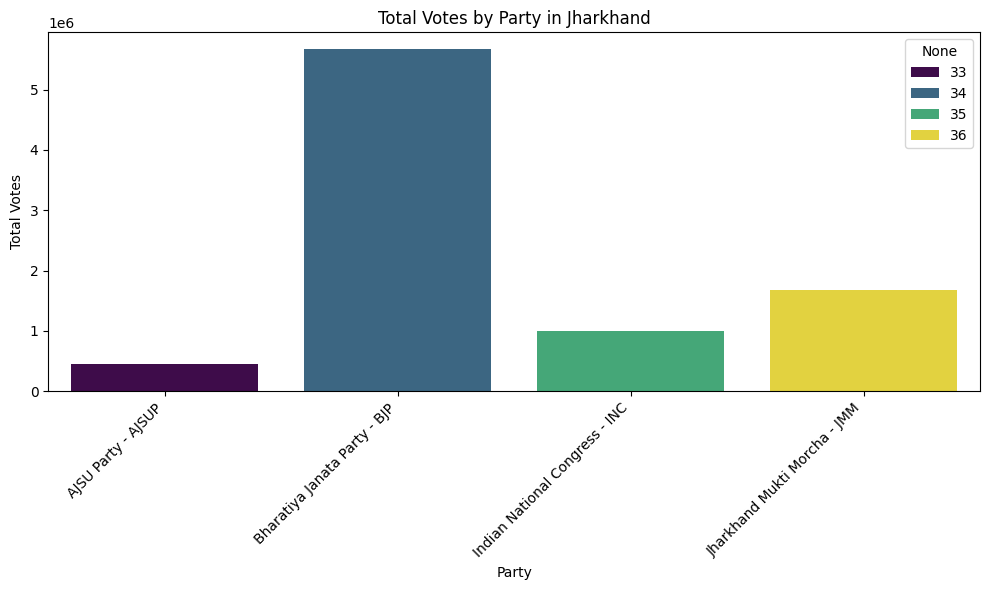

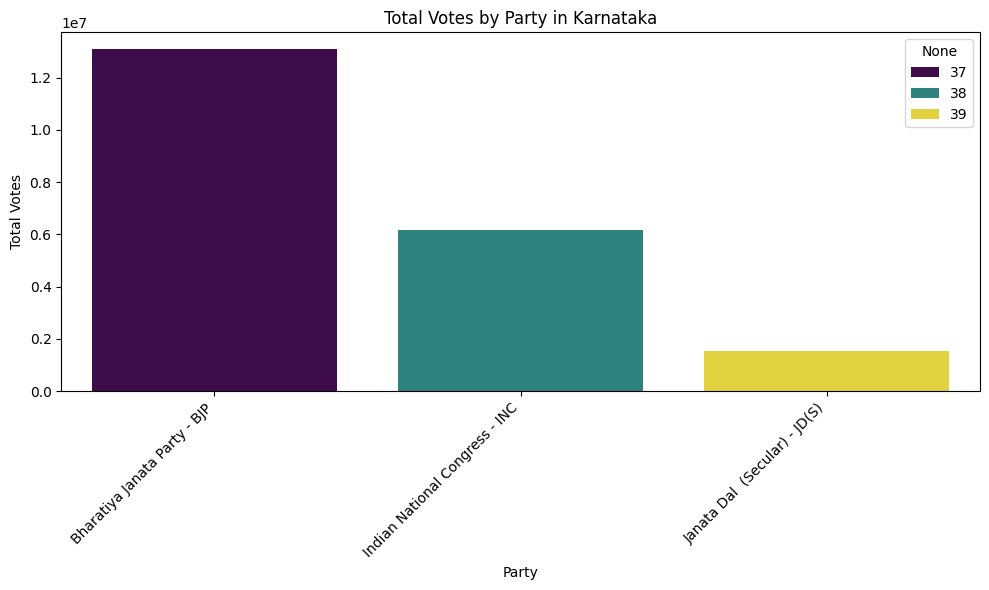

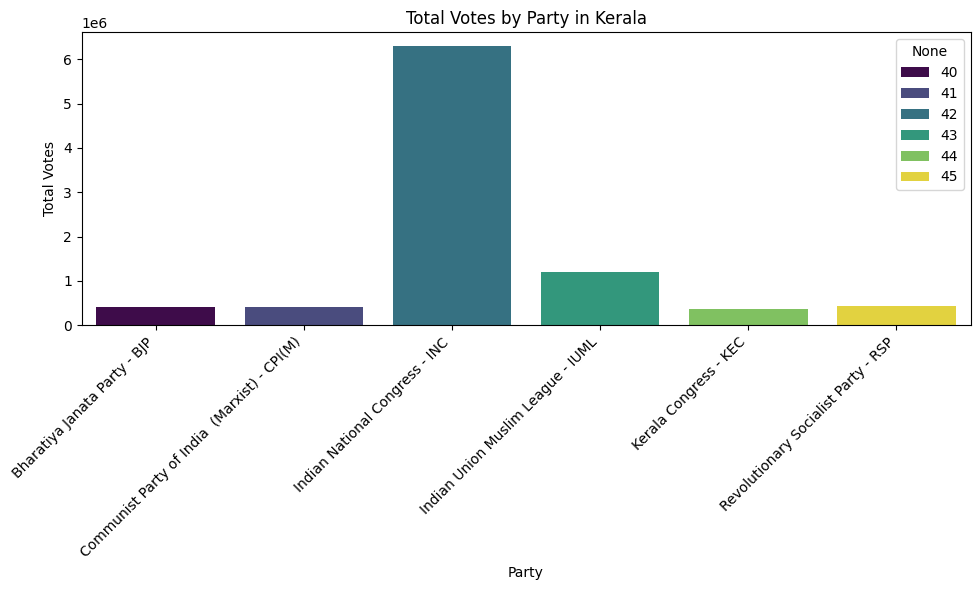

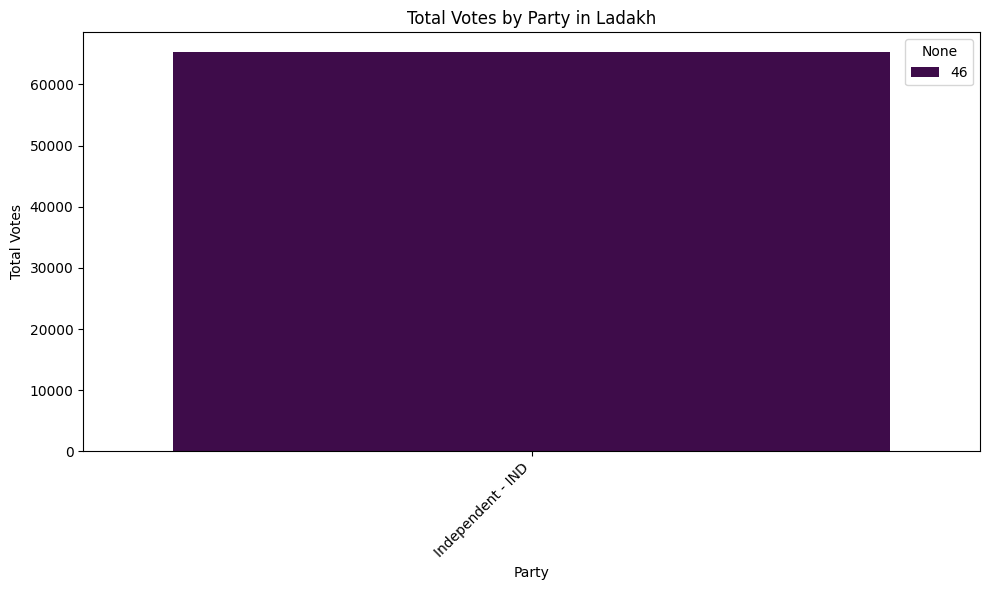

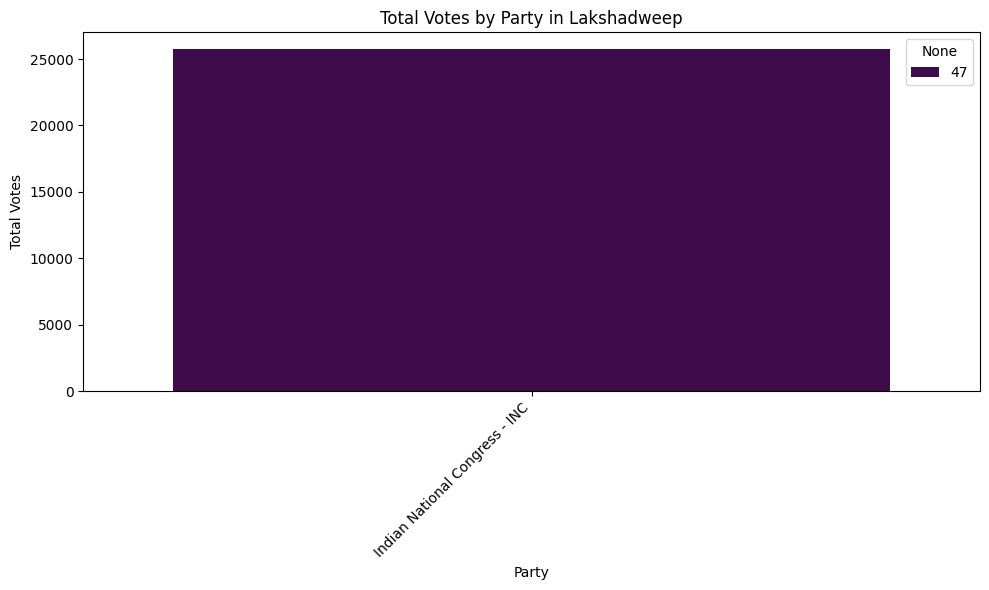

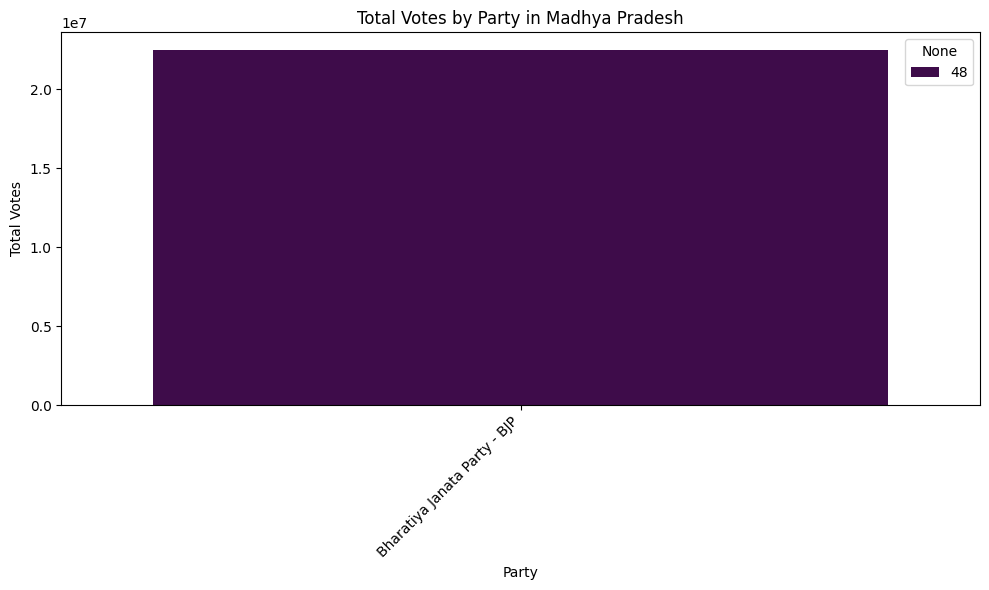

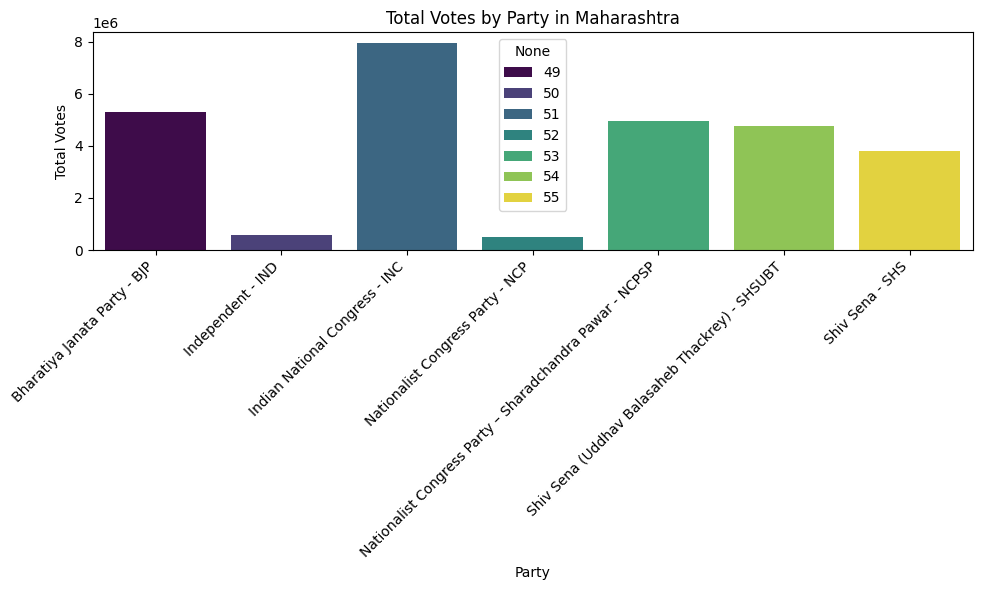

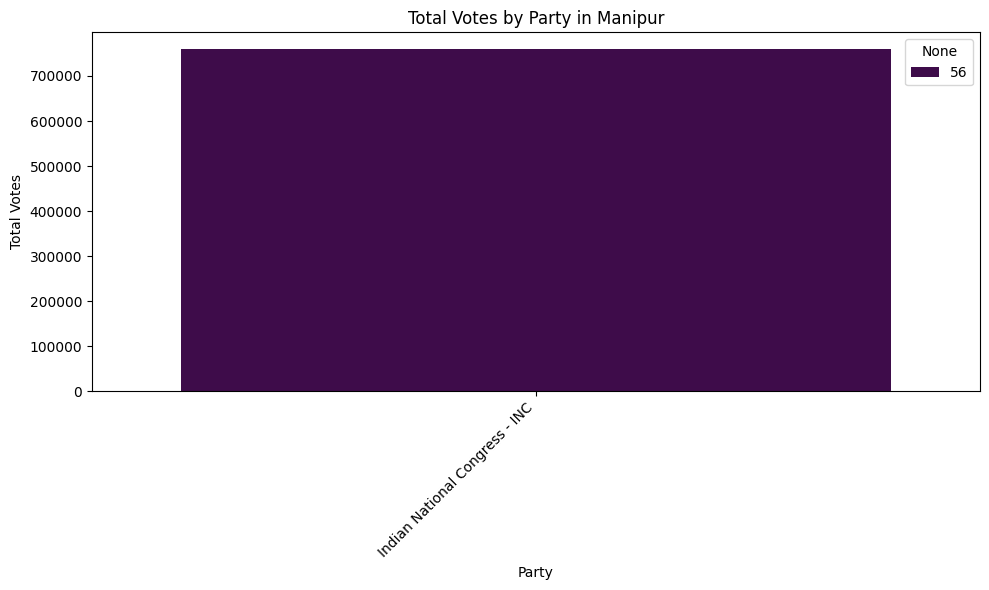

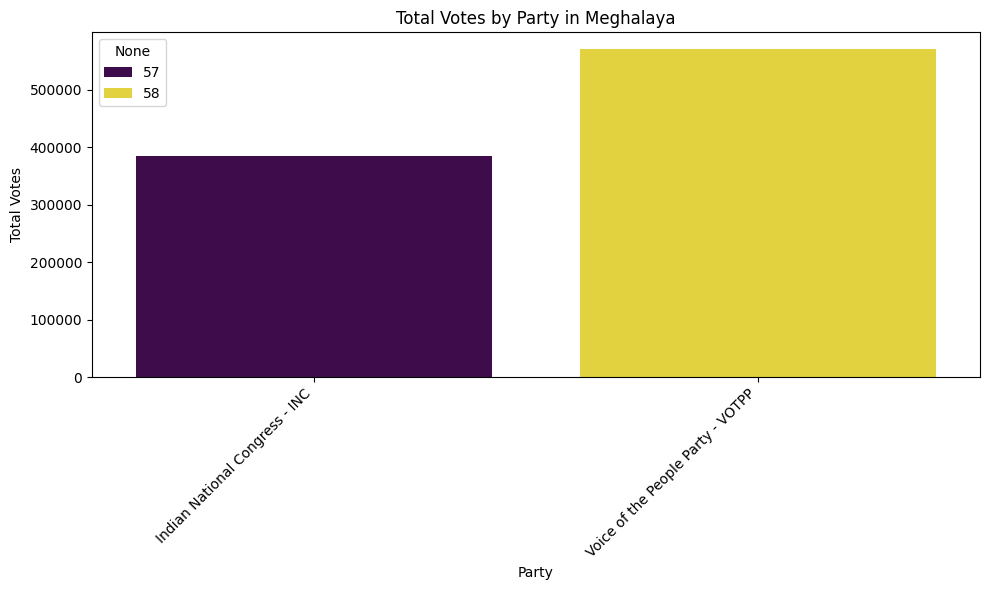

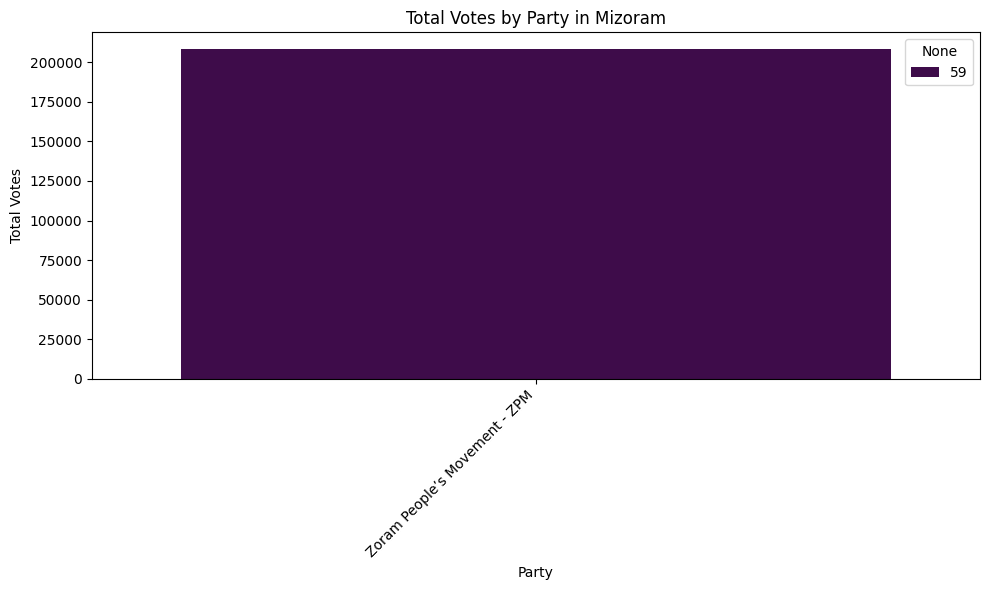

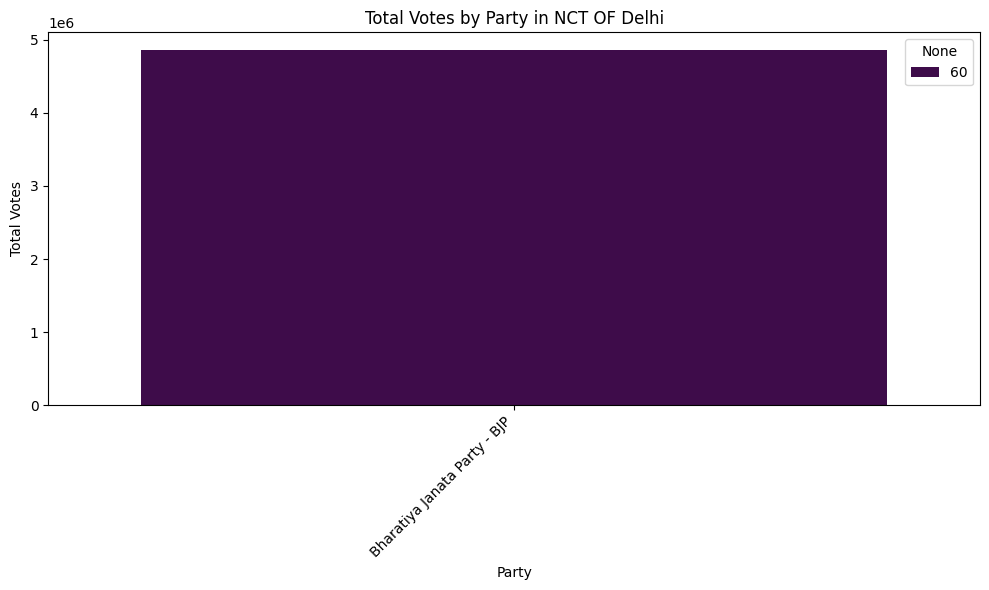

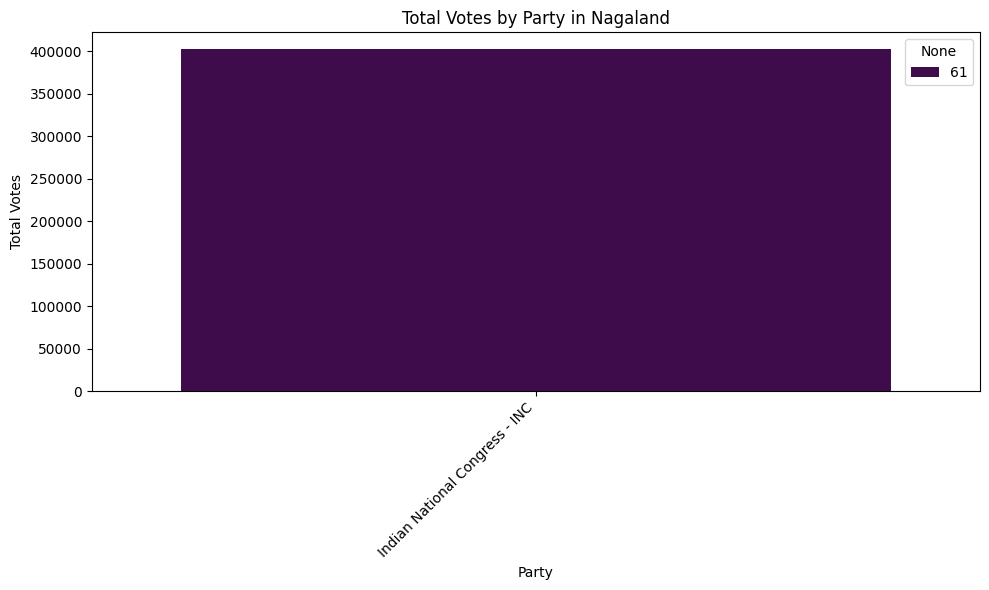

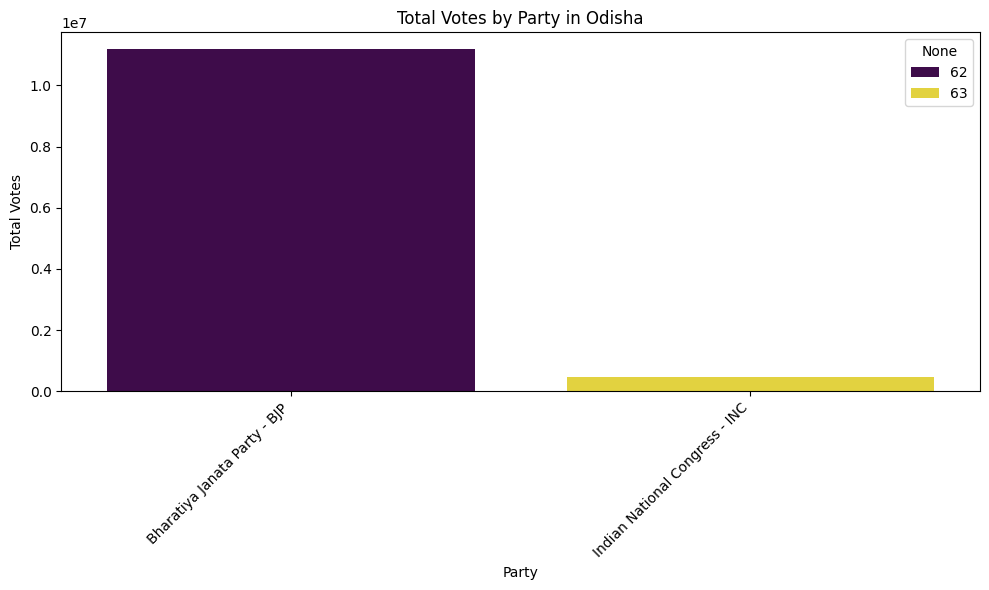

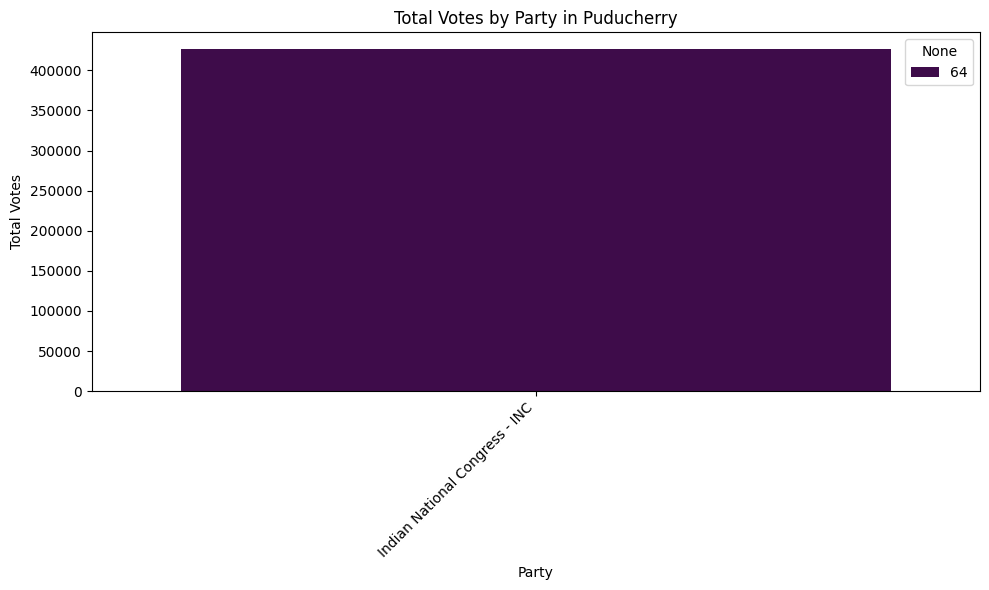

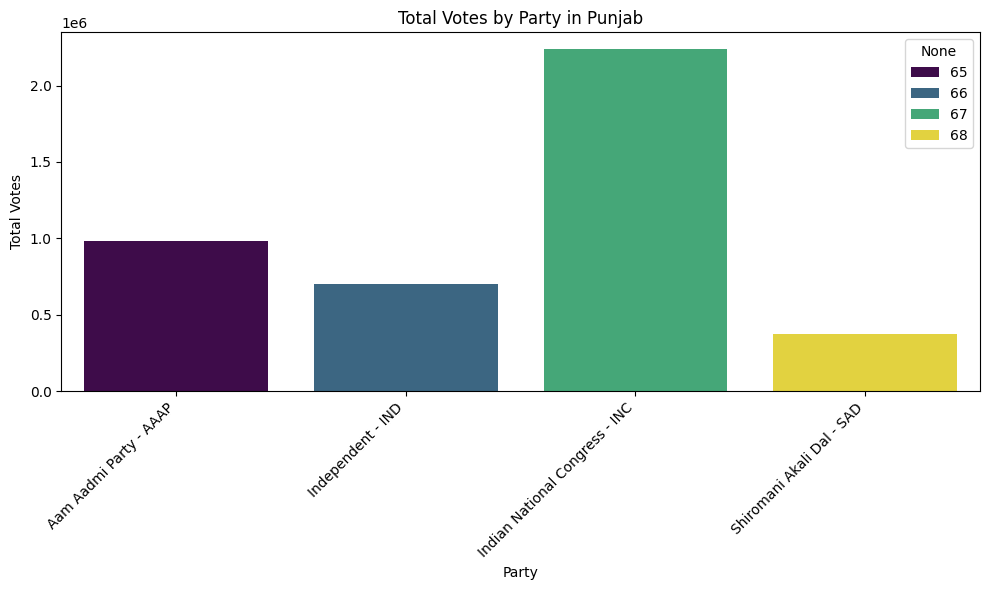

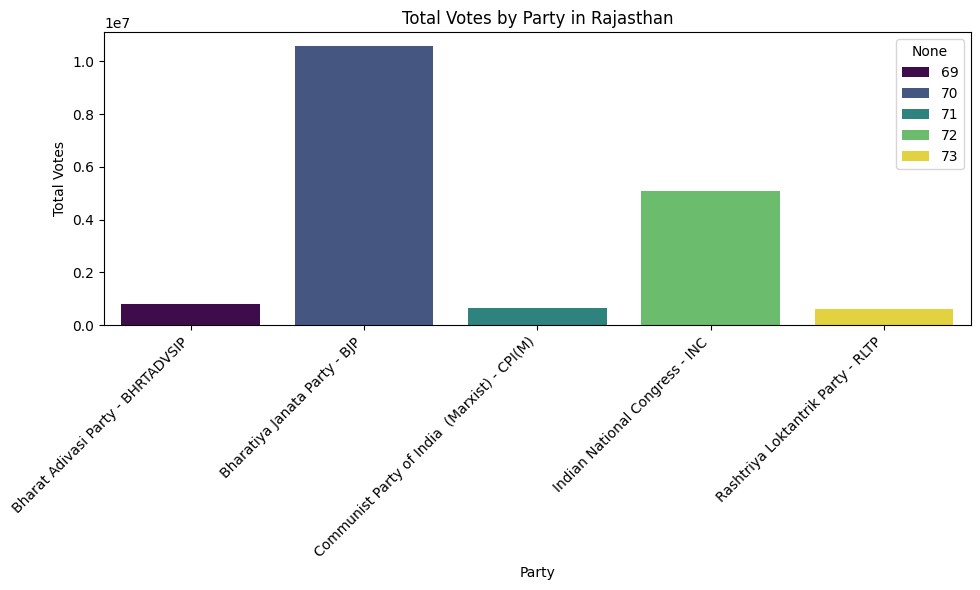

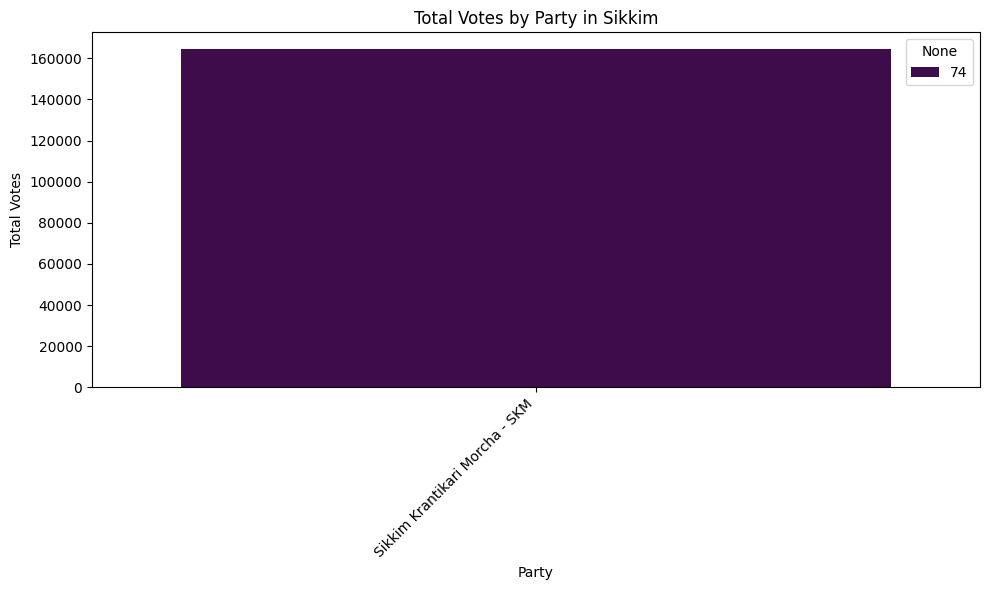

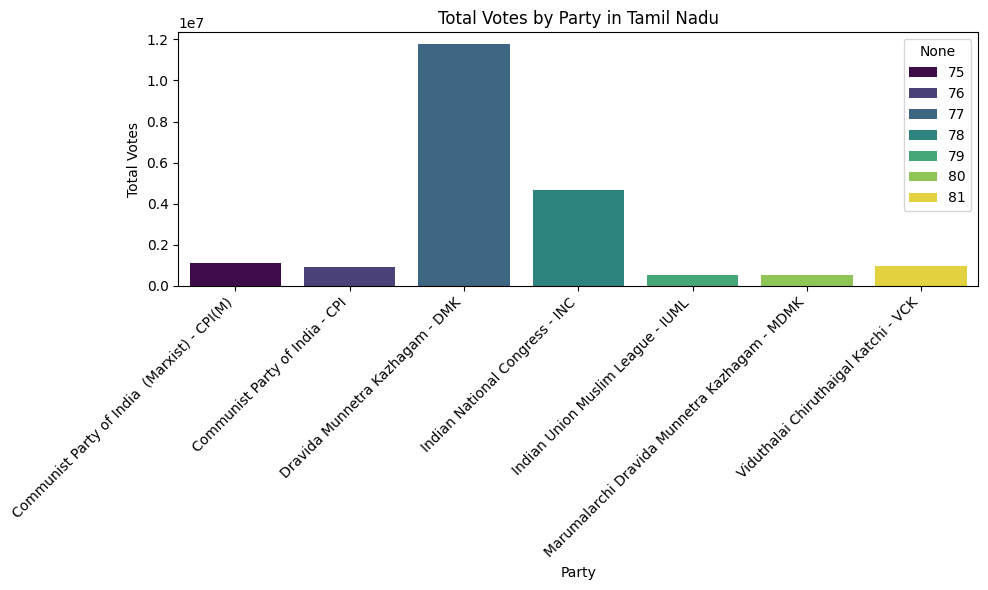

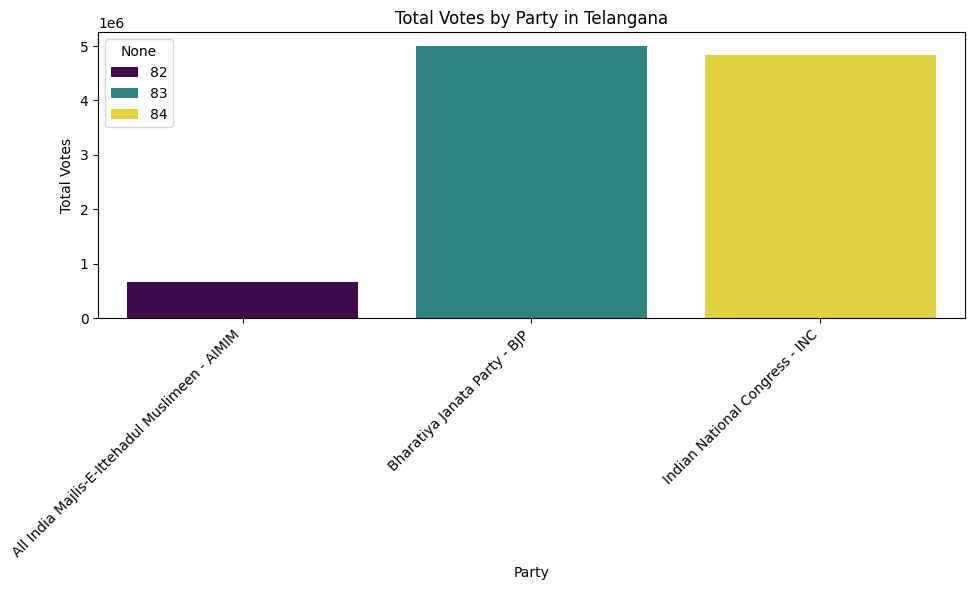

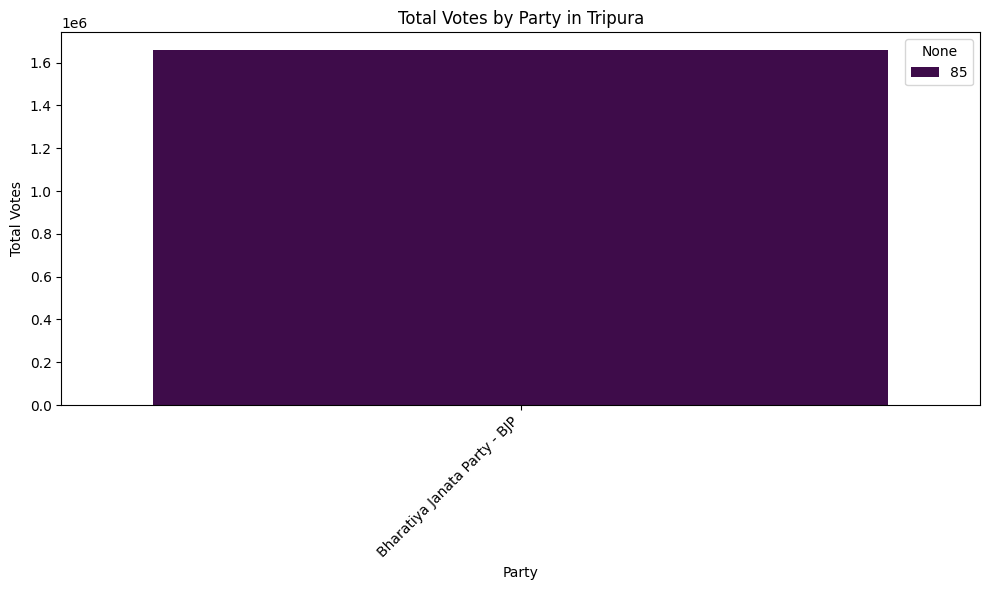

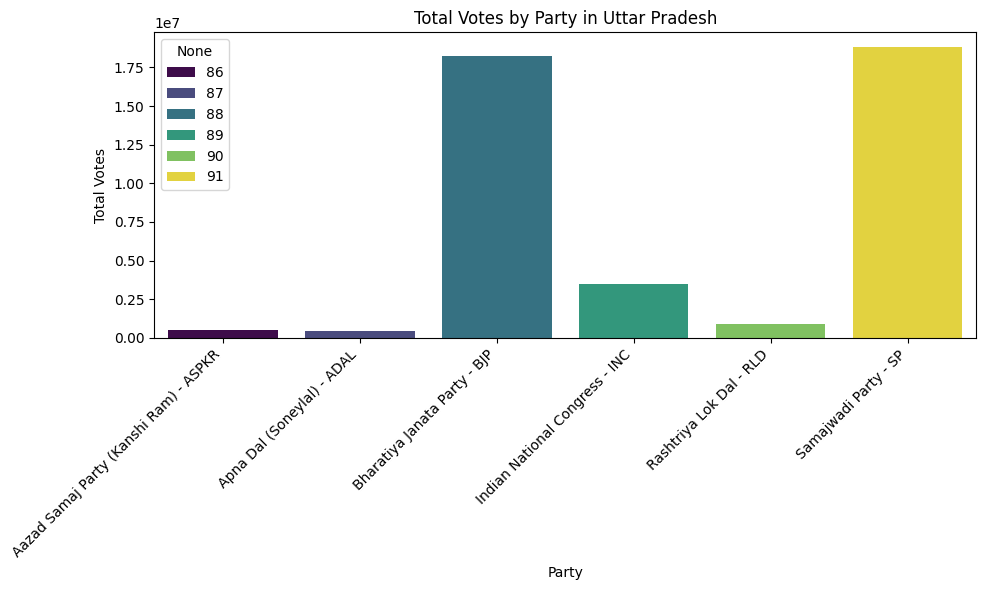

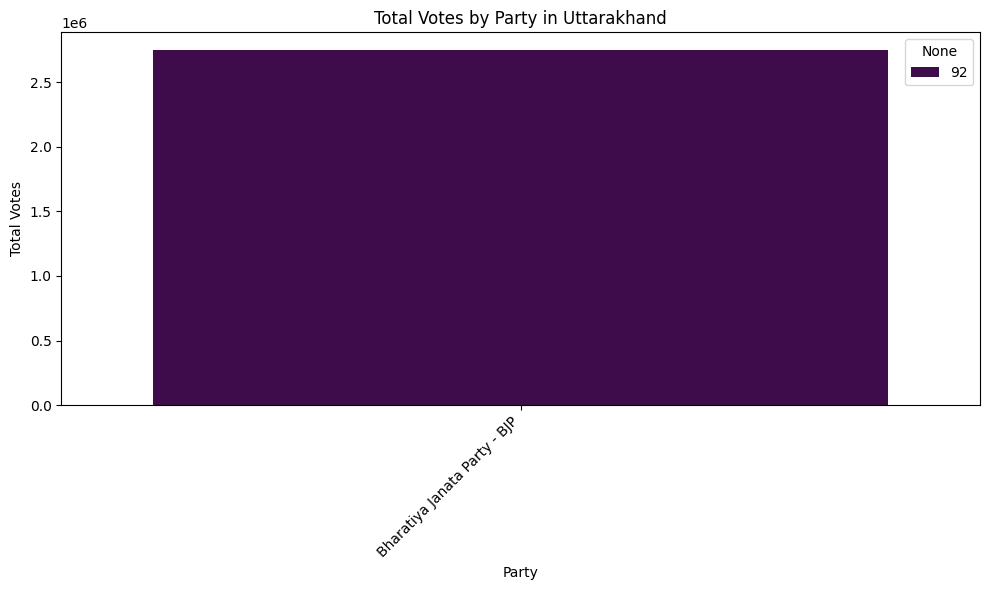

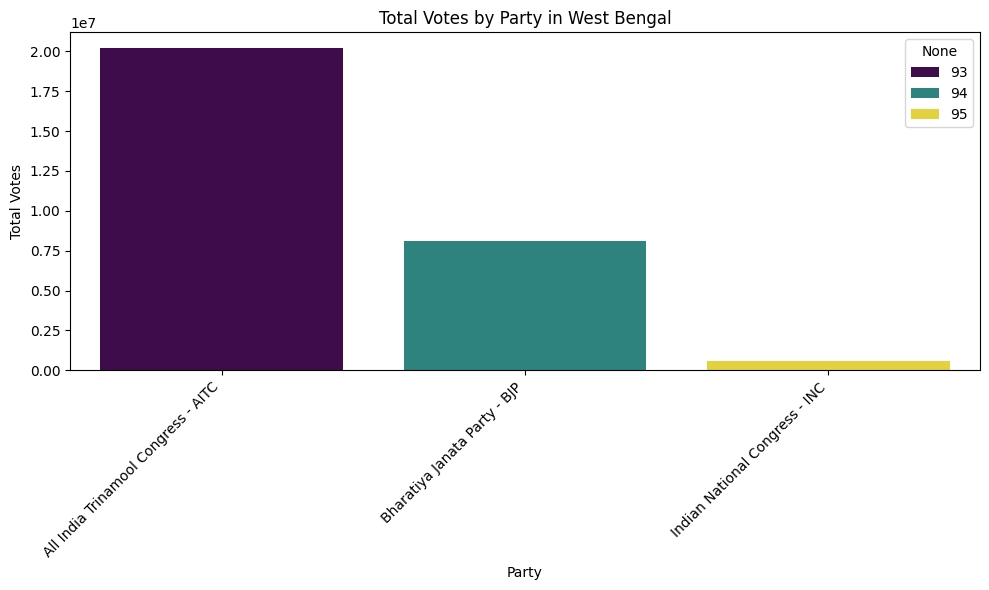

In [42]:
for state in states:
    state_data = state_wise_party[state_wise_party['StateName'] == state]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party name', y='Total Votes', data=state_data,hue=state_data.index, palette='viridis')
    plt.title(f'Total Votes by Party in {state}')
    plt.xlabel('Party')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 10. Candidate wise highest votes

This shows about the Seats won by highest votes

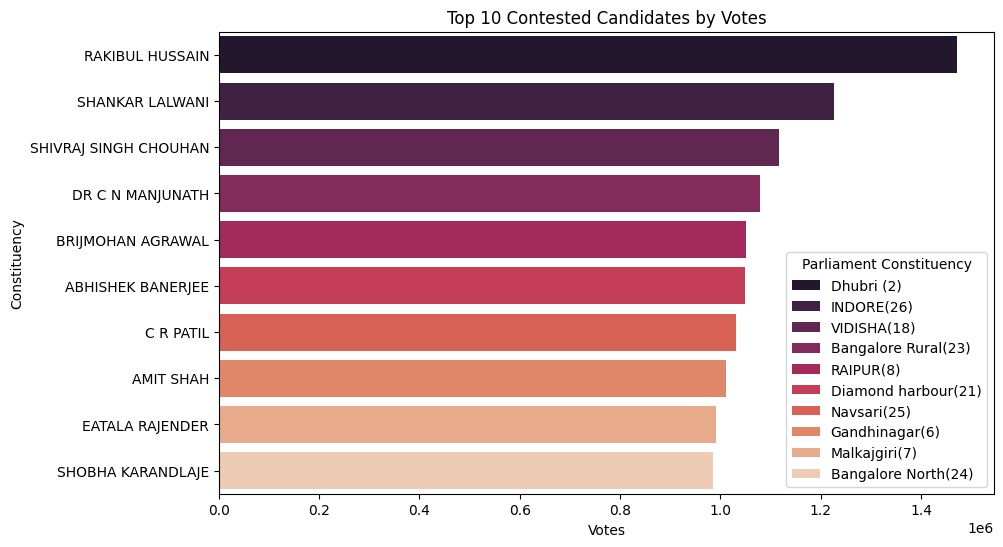

In [43]:
top_contested_seats = winners_list.sort_values(by='Total Votes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='Winning Candidate',hue='Parliament Constituency',data=top_contested_seats, palette='rocket')
plt.xlabel('Votes')
plt.ylabel('Constituency')
plt.title('Top 10 Contested Candidates by Votes')
plt.show()
